In [1]:
'''
We are learning how to use LSTM to do forecasting. Follow the code and explain it when it is needed.
'''

'\nWe are learning how to use LSTM to do forecasting. Follow the code and explain it when it is needed.\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

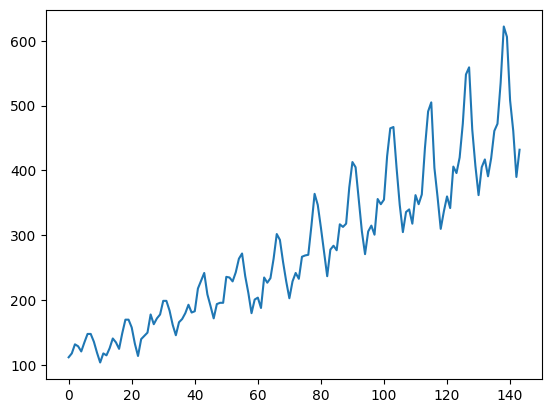

In [3]:
#load the dataset

training_set = pd.read_csv('../data/airline-passengers.csv')

training_set = training_set.iloc[:,1:2].values

plt.plot(training_set, label = 'Airlines Data')
plt.show()

In [4]:
'''
***Explain*** What is the sliding_windows function doing here?, and what does the seq_length value mean?
'''

seq_length = 5

def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)



sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

## Model

In [5]:
'''
LSTM Network
'''

class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        '''
        ***Explain*** Why do we need h_0 and c_0?
        '''
        
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

## Training

In [6]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1
num_classes = 1

'''
***Explain*** Why are the input size and the num_classes equal to one?, should not it be input_size = seq_length? 
'''

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

# for np in lstm.parameters():
#     print(np)

In [7]:


criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.04784
Epoch: 100, loss: 0.00422
Epoch: 200, loss: 0.00235
Epoch: 300, loss: 0.00184
Epoch: 400, loss: 0.00173
Epoch: 500, loss: 0.00170
Epoch: 600, loss: 0.00168
Epoch: 700, loss: 0.00166
Epoch: 800, loss: 0.00164
Epoch: 900, loss: 0.00162
Epoch: 1000, loss: 0.00161
Epoch: 1100, loss: 0.00160
Epoch: 1200, loss: 0.00160
Epoch: 1300, loss: 0.00159
Epoch: 1400, loss: 0.00159
Epoch: 1500, loss: 0.00158
Epoch: 1600, loss: 0.00158
Epoch: 1700, loss: 0.00158
Epoch: 1800, loss: 0.00157
Epoch: 1900, loss: 0.00157


## Testing for Airplane Passengers Dataset

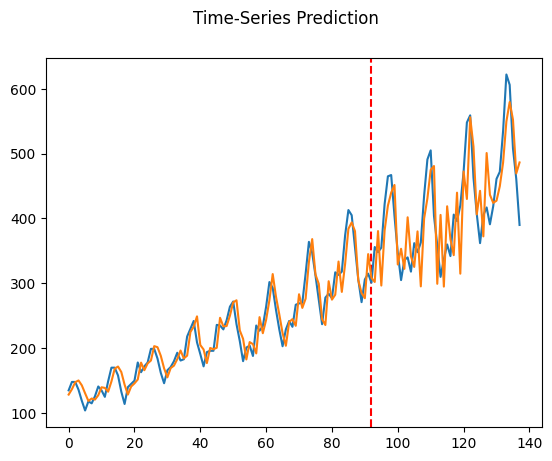

In [8]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

#Plot the Predictions
plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

In [9]:
'''
***Explain*** Rerun your model with 5000 epochs. Do you notice something strange? If yes, provide an explanation.
'''

'\n***Explain Rerun*** your model with 5000 epochs. Do you notice something strange? If yes, provide an explanation.\n'

In [10]:
'''
Implement MSE calculation for the test data
'''

'\nImplement MSE calculation for the test data\n'